In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import plotly.colors as colors

pio.templates.default  = "plotly_white"

In [5]:
data = pd.read_excel(r"/kaggle/input/superstore-dataset/Superstore-Sales.xlsx")

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [7]:
data.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [8]:
data["Order Date"] = pd.to_datetime(data["Order Date"])
data["Ship Date"] = pd.to_datetime(data["Ship Date"])

In [9]:
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [10]:
data["Month of Order"] = data["Order Date"].dt.strftime("%B")
data["Year of order"] = data["Order Date"].dt.year
data["Order Day of Week"] = data["Order Date"].dt.day_name()

In [11]:
data.head(10)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Month of Order,Year of order,Order Day of Week
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,November,2016,Tuesday
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,November,2016,Tuesday
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,June,2016,Sunday
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,October,2015,Sunday
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,October,2015,Sunday
5,6,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694,June,2014,Monday
6,7,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,Office Supplies,Art,Newell 322,7.2800,4,0.00,1.9656,June,2014,Monday
7,8,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,Technology,Phones,Mitel 5320 IP Phone VoIP phone,907.1520,6,0.20,90.7152,June,2014,Monday
8,9,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,Office Supplies,Binders,DXL Angle-View Binders with Locking Rings by S...,18.5040,3,0.20,5.7825,June,2014,Monday
9,10,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,Office Supplies,Appliances,Belkin F5C206VTEL 6 Outlet Surge,114.9000,5,0.00,34.4700,June,2014,Monday


In [12]:
yearly_sales = data.groupby("Year of order")["Sales"].sum().reset_index()
yearly_sales

,Year of order,Sales
0,2014,484247.4981
1,2015,470532.5090
2,2016,609205.5980
3,2017,733215.2552


In [13]:
monthly_sales = data.groupby("Month of Order")["Sales"].sum().reset_index()
monthly_sales

,Month of Order,Sales
0,April,137762.1286
1,August,159044.0630
2,December,325293.5035
3,February,59751.2514
4,January,94924.8356
5,July,147238.0970
6,June,152718.6793
7,March,205005.4888
8,May,155028.8117
9,November,352461.0710


In [14]:
monthly_sales.describe()

,Sales
count,12.000000
mean,191433.405025
std,91938.252097
min,59751.251400
25%,144869.104900
50%,157036.437350
75%,230666.603025
max,352461.071000


In [15]:
sales_by_days = data.groupby("Order Day of Week")["Sales"].sum().reset_index()
sales_by_days

,Order Day of Week,Sales
0,Friday,427692.2593
1,Monday,428937.8157
2,Saturday,357984.6830
3,Sunday,385353.8464
4,Thursday,321965.7785
5,Tuesday,287209.5022
6,Wednesday,88056.9752


In [16]:
sales_by_days.describe()

,Sales
count,7.000000
mean,328171.551471
std,118031.252779
min,88056.975200
25%,304587.640350
50%,357984.683000
75%,406523.052850
max,428937.815700


In [17]:
sales_by_category = data.groupby("Category")["Sales"].sum().reset_index()
sales_by_category

,Category,Sales
0,Furniture,741999.7953
1,Office Supplies,719047.0320
2,Technology,836154.0330


In [18]:
sales_by_category.describe()

,Sales
count,3.000000
mean,765733.620100
std,62056.290983
min,719047.032000
25%,730523.413650
50%,741999.795300
75%,789076.914150
max,836154.033000


In [19]:
sales_by_sub = data.groupby("Sub-Category")["Sales"].sum().reset_index()
sales_by_sub

,Sub-Category,Sales
0,Accessories,167380.3180
1,Appliances,107532.1610
2,Art,27118.7920
3,Binders,203412.7330
4,Bookcases,114879.9963
5,Chairs,328449.1030
6,Copiers,149528.0300
7,Envelopes,16476.4020
8,Fasteners,3024.2800
9,Furnishings,91705.1640


In [20]:
sales_by_sub.describe()

,Sales
count,17.000000
mean,135129.462371
std,102940.280693
min,3024.280000
25%,46673.538000
50%,114879.996300
75%,203412.733000
max,330007.054000


In [21]:
profit_by_month = data.groupby("Month of Order")["Profit"].sum().reset_index()
profit_by_month

,Month of Order,Profit
0,April,11587.4363
1,August,21776.9384
2,December,43369.1919
3,February,10294.6107
4,January,9134.4461
5,July,13832.6648
6,June,21285.7954
7,March,28594.6872
8,May,22411.3078
9,November,35468.4265


In [22]:
profit_by_month.describe()

,Profit
count,12.000000
mean,23866.418475
std,11420.058419
min,9134.446100
25%,13271.357675
50%,22094.123100
75%,32705.137600
max,43369.191900


In [23]:
profit_by_category = data.groupby("Category")["Profit"].sum().reset_index()
profit_by_category

,Category,Profit
0,Furniture,18451.2728
1,Office Supplies,122490.8008
2,Technology,145454.9481


In [24]:
profit_by_category.describe()

,Profit
count,3.000000
mean,95465.673900
std,67677.555348
min,18451.272800
25%,70471.036800
50%,122490.800800
75%,133972.874450
max,145454.948100


In [25]:
profit_by_sub = data.groupby("Sub-Category")["Profit"].sum().reset_index()
profit_by_sub

,Sub-Category,Profit
0,Accessories,41936.6357
1,Appliances,18138.0054
2,Art,6527.7870
3,Binders,30221.7633
4,Bookcases,-3472.5560
5,Chairs,26590.1663
6,Copiers,55617.8249
7,Envelopes,6964.1767
8,Fasteners,949.5182
9,Furnishings,13059.1436


In [26]:
profit_by_sub.describe()

,Profit
count,17.000000
mean,16846.883629
std,19689.825106
min,-17725.481100
25%,3384.756900
50%,13059.143600
75%,30221.763300
max,55617.824900


In [27]:
sales_profit_by_segment = data.groupby("Segment").agg({"Sales" : "sum", "Profit" : "sum"}).reset_index()
sales_profit_by_segment

,Segment,Sales,Profit
0,Consumer,1.161401e+06,134119.2092
1,Corporate,7.061464e+05,91979.1340
2,Home Office,4.296531e+05,60298.6785


In [28]:
sales_profit_by_segment.describe()

,Sales,Profit
count,3.000000e+00,3.000000
mean,7.657336e+05,95465.673900
std,3.694954e+05,37033.561246
min,4.296531e+05,60298.678500
25%,5.678998e+05,76138.906250
50%,7.061464e+05,91979.134000
75%,9.337739e+05,113049.171600
max,1.161401e+06,134119.209200


In [29]:
sales_profit_by_segment = data.groupby("Segment").agg({"Sales" : "sum", "Profit" : "sum"}).reset_index()

sales_profit_by_segment["Sales_to_Profit_Ratio"] = sales_profit_by_segment["Sales"] / sales_profit_by_segment["Profit"]

sales_profit_by_segment[["Segment" , "Sales_to_Profit_Ratio"]]

,Segment,Sales_to_Profit_Ratio
0,Consumer,8.659471
1,Corporate,7.677245
2,Home Office,7.125416


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


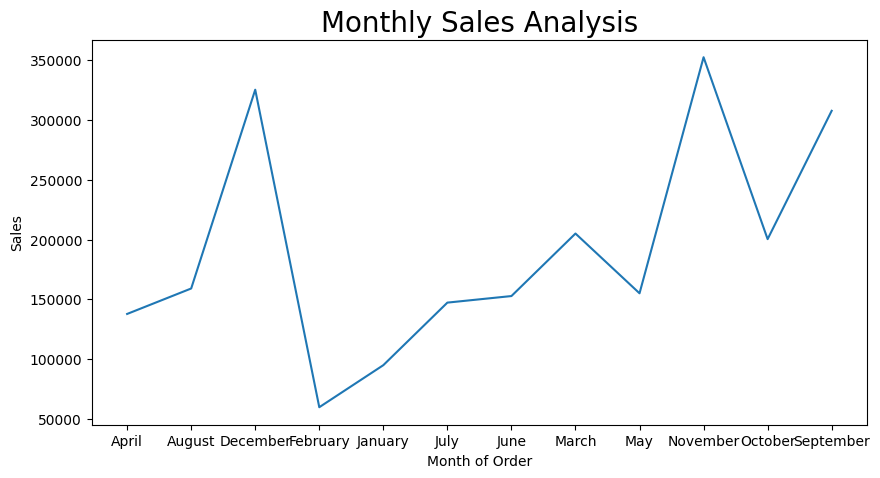

In [30]:
plt.figure(figsize=(10, 5))

sns.lineplot(data = monthly_sales, x='Month of Order', y='Sales')
plt.title('Monthly Sales Analysis', fontsize = 20)
plt.savefig(r"C:\Users\saket\Downloads\MINI PROJECT\Plots\monthly_sales.png", dpi=300, bbox_inches='tight')

plt.show()

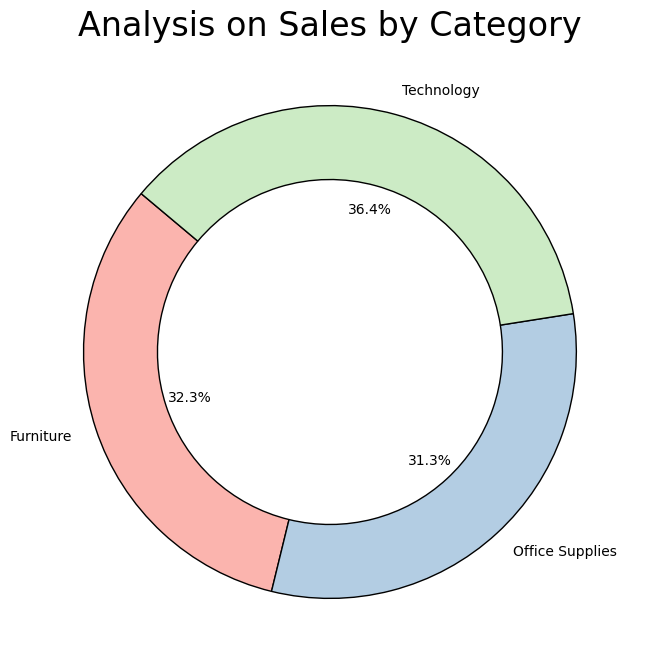

In [31]:
labels = sales_by_category['Category']
sizes = sales_by_category['Sales']

colors = plt.cm.Pastel1.colors

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors,
        wedgeprops=dict(width=0.3, edgecolor='black'))

plt.title('Analysis on Sales by Category', fontsize=24)
plt.savefig(r"C:\Users\saket\Downloads\MINI PROJECT\Plots\Analysis_on_Sales_by_Category.png", dpi=300, bbox_inches='tight')
plt.show()

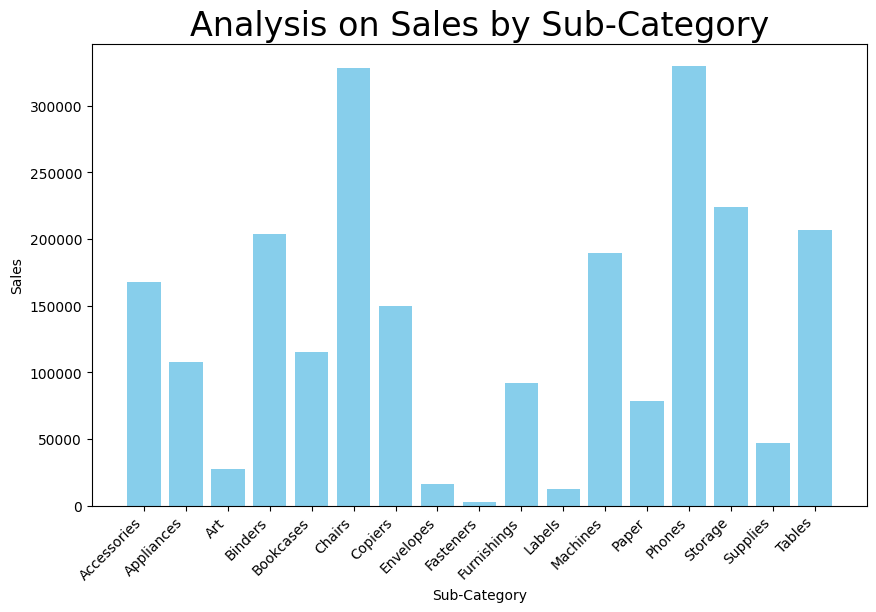

In [32]:
plt.figure(figsize=(10, 6))
plt.bar(sales_by_sub['Sub-Category'], sales_by_sub['Sales'], color='skyblue')

plt.title('Analysis on Sales by Sub-Category', fontsize=24)

plt.xlabel('Sub-Category')
plt.ylabel('Sales')

plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0, ha="right")
plt.savefig(r"C:\Users\saket\Downloads\MINI PROJECT\Plots\Analysis on Sales by Sub-Category.png", dpi=300, bbox_inches='tight')

plt.show()

In [33]:
fig_profit_by_month = px.bar(profit_by_month,
                             x="Month of Order",
                             y="Profit",
                             title="Analysis on Monthly Profit")
plt.savefig(r"C:\Users\saket\Downloads\MINI PROJECT\Plots\Analysis on Sales by Sub-Category.png", dpi=300, bbox_inches='tight')
fig_profit_by_month.show()

<Figure size 640x480 with 0 Axes>

In [34]:
fig_profit_by_category = px.pie(profit_by_category,
                                values = "Profit",
                                names = "Category",
                                hole = 0.5,
                                color_discrete_sequence = px.colors.qualitative.Pastel)
fig_profit_by_category.update_traces(textposition = "inside", textinfo = "percent+label")
fig_profit_by_category.update_layout(title_text = "Analysis on Profit by Category", title_font = dict(size = 24))
plt.savefig(r"C:\Users\saket\Downloads\MINI PROJECT\Plots\Analysis on Sales by Sub-Category.png", dpi=300, bbox_inches='tight')
fig_profit_by_category.show()

<Figure size 640x480 with 0 Axes>

In [35]:
fig_profit_by_sub = px.bar(profit_by_sub,
                           x = "Sub-Category",
                           y = "Profit",
                           title = "Analysis on Profit by Sub-Category")
plt.savefig(r"C:\Users\saket\Downloads\MINI PROJECT\Plots\Analysis on Sales by Sub-Category.png", dpi=300, bbox_inches='tight')
fig_profit_by_sub.show()

<Figure size 640x480 with 0 Axes>

In [36]:
color_palette = ['#1f77b4', '#ff7f0e']
fig_sales_profit_segment = go.Figure()

fig_sales_profit_segment.add_trace(go.Bar(x = sales_profit_by_segment["Segment"],
                                          y = sales_profit_by_segment["Profit"],
                                          name = "Profit",
                                          marker_color = color_palette[0]))
fig_sales_profit_segment.add_trace(go.Bar(x = sales_profit_by_segment["Segment"],
                                          y = sales_profit_by_segment["Sales"],
                                          name = "Sales",
                                          marker_color = color_palette[1]))
fig_sales_profit_segment.update_layout(title = "Sales and Profit Analysis by Segment",
                                       xaxis_title = "Customer Segment", yaxis_title = "Amount")
plt.savefig(r"C:\Users\saket\Downloads\MINI PROJECT\Plots\Analysis on Sales by Sub-Category.png", dpi=300, bbox_inches='tight')
fig_sales_profit_segment.show()

<Figure size 640x480 with 0 Axes>

In [37]:
fig_sales_by_days = px.pie(sales_by_days,
                           values = "Sales",
                           names = "Order Day of Week",
                           hole = 0.5,
                           color_discrete_sequence = px.colors.qualitative.Pastel)
fig_sales_by_days.update_traces(textposition = "inside", textinfo = "percent+label")
fig_sales_by_days.update_layout(title_text = "Analysis on Sales by Day of the Week", title_font = dict(size = 24))
plt.savefig(r"C:\Users\saket\Downloads\MINI PROJECT\Plots\Analysis on Sales by Sub-Category.png", dpi=300, bbox_inches='tight')
fig_sales_by_days.show()

<Figure size 640x480 with 0 Axes>

In [38]:
sales_profit_by_segment = data.groupby("Segment").agg({"Sales" : "sum", "Profit" : "sum"}).reset_index()
sales_profit_by_segment["Sales_to_Profit_Ratio"] = sales_profit_by_segment["Sales"] / sales_profit_by_segment["Profit"]
sales_profit_by_segment[["Segment" , "Sales_to_Profit_Ratio"]]

,Segment,Sales_to_Profit_Ratio
0,Consumer,8.659471
1,Corporate,7.677245
2,Home Office,7.125416


In [39]:
fig_profit_by_month = px.bar(yearly_sales,
                             x="Year of order",
                             y="Sales",
                             title="Analysis on Yearly Sales")
plt.savefig(r"C:\Users\saket\Downloads\MINI PROJECT\Plots.png", dpi=300, bbox_inches='tight')
fig_profit_by_month.show()

<Figure size 640x480 with 0 Axes>